In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns

# Import File

In [3]:
bangalore = pd.read_csv("datasets/Bangalore.csv")
chennai = pd.read_csv("datasets/Chennai.csv")

# gabungkan file tersebut dan namai dengan df
df = pd.concat([bangalore, chennai])

# bikin index ulang.
df = df.reset_index()

# hapus colom index lama.
df.drop(columns="index", inplace=True)

# tampilkan 5 data
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


# Datasets Splitting

In [4]:
X = df.drop(columns="Price")
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8976, 39), (2245, 39), (8976,), (2245,))

In [6]:
X_train.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
8037,1375,Mogappair,3,1,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2098,2591,Whitefield Hope Farm Junction,4,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
872,1660,Anjanapura,3,0,0,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
4401,1135,Rajarajeshwari nagar,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4511,1397,sarjapura attibele road,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


# Visualize

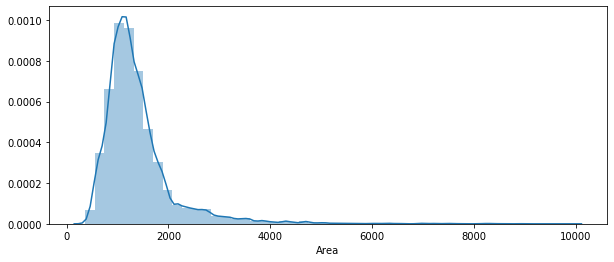

In [7]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(df["Area"])
plt.show()

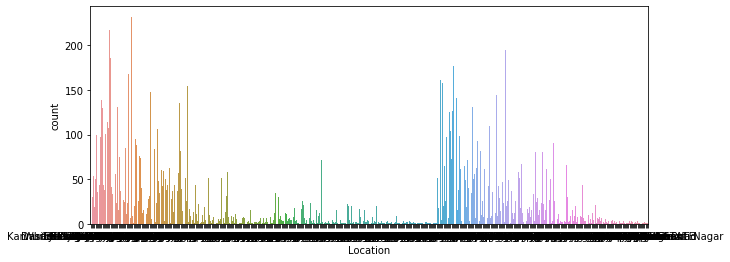

In [8]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(df["Location"])
plt.show()

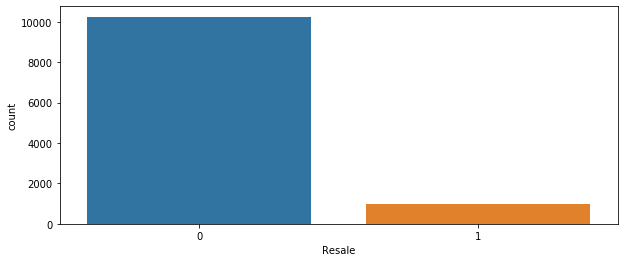

In [10]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(df["Resale"])
plt.show()

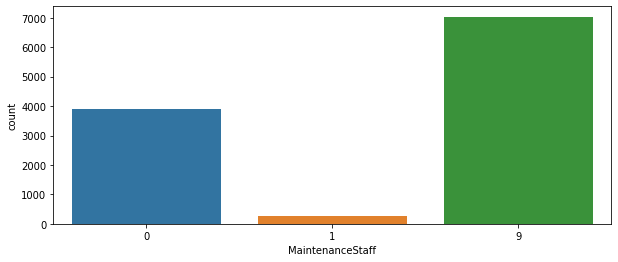

In [11]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(df["MaintenanceStaff"])
plt.show()